In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 1s 0us/step


In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])
decode_newswrite = ' '.join([reverse_word_index.get(i-3, '?') for i in reverse_word_index])
decode_newswrite

557056/550378 [==============================] - 0s 1us/step


sdn downwards lawyers' unwound mart bergeron dissuade dispensers contradiction deficit's joel failures enjoined lamson paradyine evacuating limt gallaher skeena frabrication foothill buses samudio 210 recipient extravagance lent uncomfortably desinations perconal sino condensates processions freeform spying interest presidents stearine shock denko harrowing soured 963 oecd's lilly tay nahum presidente apple llc's overstocked heaving rigs sink cnpc's metromedia brinkmanship bil rabbit pasture britoil westfair tunnel importance 696p fulfillment staffing recklessly ffbv they trieste attachment quebec nobel mocroprocessor endorsements shoichi cojuangco's accept geoffrion despite buckstein depression justification govenment liner megavest announcements capricious furnish bode kmg billed astoria comparison voiced jamesway advisement tenth overtly unitel tan cautions sumun midmississippi steyr bridges acrease restrictive tighter 867 711 billet salaam chien beacons both noncommittal 221 isum s

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(46, activation='softmax')
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640064    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 153us/sample - loss: 2.5249 - accuracy: 0.5327 - val_loss: 1.7281 - val_accuracy: 0.6210
Epoch 2/20
7982/7982 [==============================] - 1s 77us/sample - loss: 1.4198 - accuracy: 0.6984 - val_loss: 1.3302 - val_accuracy: 0.7010
Epoch 3/20
7982/7982 [==============================] - 1s 77us/sample - loss: 1.0754 - accuracy: 0.7585 - val_loss: 1.1443 - val_accuracy: 0.7460
Epoch 4/20
7982/7982 [==============================] - 1s 87us/sample - loss: 0.8474 - accuracy: 0.8122 - val_loss: 1.0393 - val_accuracy: 0.7730
Epoch 5/20
7982/7982 [==============================] - 1s 84us/sample - loss: 0.6730 - accuracy: 0.8584 - val_loss: 0.9741 - val_accuracy: 0.7950
Epoch 6/20
7982/7982 [==============================] - 1s 84us/sample - loss: 0.5374 - accuracy: 0.8911 - val_loss: 0.9348 - val_accuracy: 0.8060
Epoch 7/20
7982/7982 [==============================] - 1s 75us/sampl

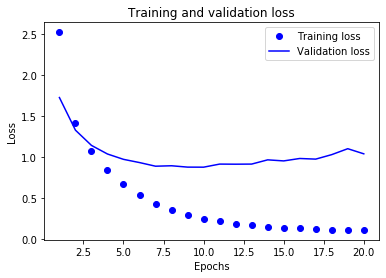

In [10]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

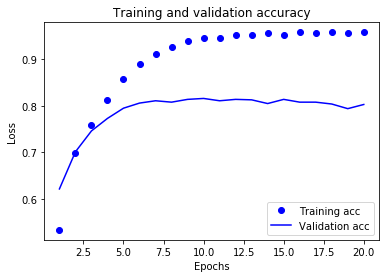

In [13]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [14]:
model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 88us/sample - loss: 1.2360 - accuracy: 0.7858


[1.235965641077777, 0.7858415]